In [1]:
import pbjam as pb
from pbjam.jar import session
import matplotlib.pyplot as plt
import numpy as np
import lightkurve as lk 
import sys
import pandas as pd
from tqdm import tqdm

In [23]:
df = pd.read_csv('pbjam/data/prior_data.csv')
df = df[10:15]
kics = [n for n in df.KIC]
numaxs = [[n, err] for n, err in zip(df.numax, df.numax_err)]
dnus = [[n, err] for n, err in zip(df.dnu, df.dnu_err)]
teffs = [[n, err] for n, err in zip(df.Teff, df.Teff_err)]
bp_rps = [[n, 0.1] for n in df.bp_rp]


In [24]:
# Initialize a jam session with a list of stars:
jam_sess = session(ID = kics, numax = numaxs, dnu = dnus, teff = teffs, bp_rp = bp_rps, nthreads=1)

In [25]:
for star in tqdm(jam_sess.stars):
    star.asymptotic_modeid(norders = 9)

  0%|          | 0/5 [00:00<?, ?it/s]

Burningham
Sampling


 20%|██        | 1/5 [01:47<07:09, 107.49s/it]

Burningham
Sampling


 40%|████      | 2/5 [03:17<05:06, 102.25s/it]

Burningham
Sampling


 60%|██████    | 3/5 [04:40<03:12, 96.43s/it] 

Burningham
Sampling


 80%|████████  | 4/5 [06:20<01:37, 97.64s/it]

Burningham
Sampling


100%|██████████| 5/5 [07:43<00:00, 93.01s/it]


    ell      nu_mu    nu_std
0     2  45.758366  3.220315
1     0  46.589141  3.274351
2     2  52.018054  3.230979
3     0  52.849881  3.283480
4     2  58.354364  3.248432
5     0  59.185249  3.299710
6     2  64.764054  3.272225
7     0  65.593909  3.322603
8     2  71.253319  3.302034
9     0  72.079433  3.351838
10    2  77.817352  3.337659
11    0  78.644000  3.387211
12    2  84.455867  3.379022
13    0  85.283438  3.428638
14    2  91.170164  3.426162
15    0  91.998800  3.476145
16    2  97.957998  3.479227
17    0  98.788734  3.529865
{'numax': array([70.40368902, 72.09327984, 72.14617844]), 'dnu': array([6.51642856, 6.52661142, 6.53307064]), 'eps': array([0.9327611 , 1.04185677, 1.06168329]), 'alpha': array([0.00986919, 0.01241495, 0.01310399]), 'd02': array([0.80537088, 0.82749994, 0.83929049]), 'env_height': array([2.73980456, 3.853133  , 3.87343135]), 'env_width': array([20.64983465, 20.91825596, 22.25348157]), 'mode_width': array([-0.73330386, -0.68816907, -0.66797593]),

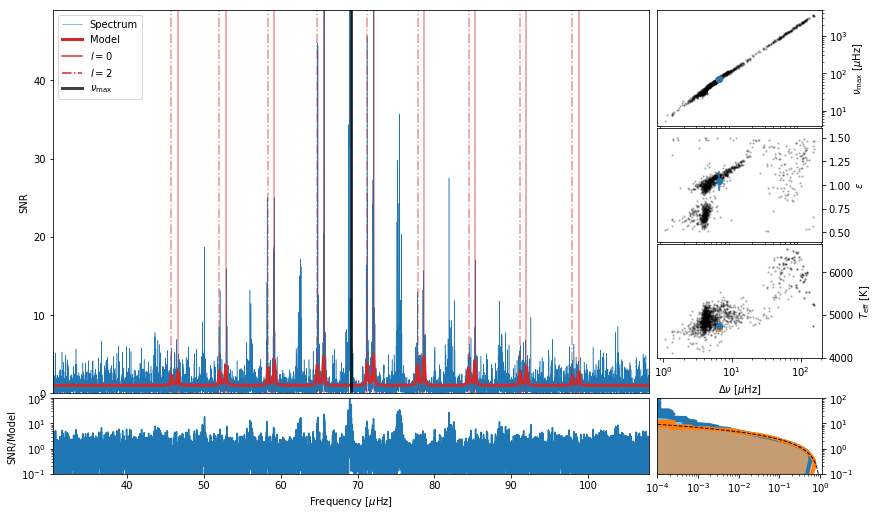

In [35]:
idx = 3
print(jam_sess.stars[idx].asy_modeID)
print(jam_sess.stars[idx].asy_bestfit)
fig = jam_sess.stars[idx].plot_asyfit()